In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d


%matplotlib inline
import pandas as pd
import numpy as np
from textblob import TextBlob


In [3]:
df = pd.read_json("Baby_5.json", lines = True)

In [4]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,097293751X,"[0, 0]",5,Perfect for new parents. We were able to keep ...,"07 16, 2013",A1HK2FQW6KXQB2,"Amanda Johnsen ""Amanda E. Johnsen""",Awesine,1373932800
1,097293751X,"[0, 0]",5,This book is such a life saver. It has been s...,"06 29, 2013",A19K65VY14D13R,angela,Should be required for all new parents!,1372464000
2,097293751X,"[0, 0]",5,Helps me know exactly how my babies day has go...,"03 19, 2014",A2LL1TGG90977E,Carter,Grandmother watching baby,1395187200
3,097293751X,"[0, 0]",5,I bought this a few times for my older son and...,"08 17, 2013",A5G19RYX8599E,cfpurplerose,repeat buyer,1376697600
4,097293751X,"[0, 0]",4,I wanted an alternative to printing out daily ...,"04 1, 2014",A2496A4EWMLQ7,C. Jeter,Great,1396310400


In [4]:
f1 = lambda x : TextBlob(x).sentiment.polarity
f2 = lambda x : TextBlob(x).sentiment.subjectivity


In [5]:
df["polarity"] = df["reviewText"].map(f1)
df["subjectivity"] = df["reviewText"].map(f2)

In [6]:
df["summary_sentiment"] = df["summary"].map(f1)

In [7]:
X = df["polarity"].values
Y = df["subjectivity"].values
Z = df["overall"].values
W = df["summary_sentiment"].values

item_asin = "B00000J3LL"

x_item =df["polarity"][df["asin"]==item_asin].values
y_item = df["subjectivity"][df["asin"]==item_asin].values
z_item = df["overall"][df["asin"]==item_asin].values
w_item = df["summary_sentiment"][df["asin"]==item_asin].values

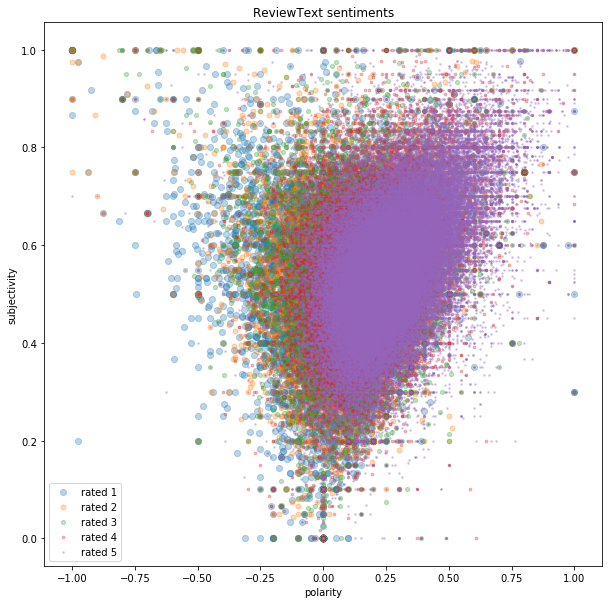

In [26]:
data = [None]*5
for i in range(5):
    data[i] = (df["polarity"][df["overall"]==i+1], df["subjectivity"][df["overall"]==i+1])
          
sizes = [150,100,70,30,10]
groups = ["rated 1", "rated 2", "rated 3", "rated 4","rated 5"]

plt.figure(figsize = (10,10))

for data,size,group in zip(data,sizes,groups):
    x,y = data
    plt.scatter(x,y, s = size, alpha = 0.3, marker = ".", label = group)
    
#ax.scatter(x_item,y_item,z_item, marker = "^", c= "black", s =200, label = item_asin)
        
plt.xlabel("polarity")
plt.ylabel("subjectivity")

plt.title("ReviewText sentiments")
plt.legend()
plt.show()



In [9]:
from sklearn.cluster import KMeans

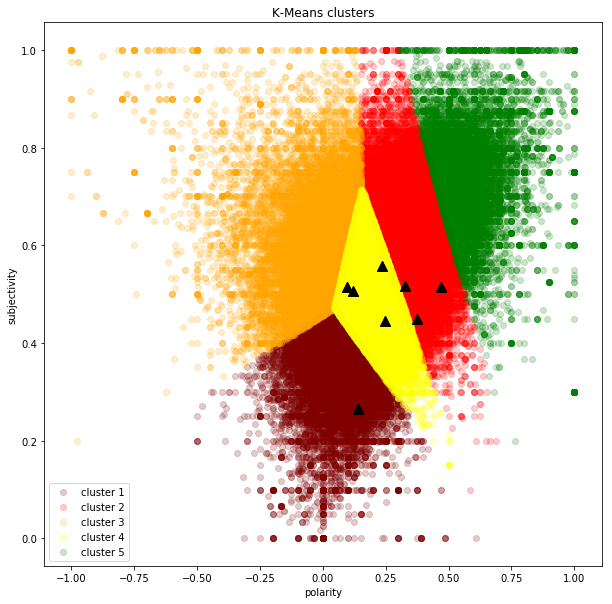

In [28]:
data = [[a,b] for a,b in zip(X,Y)]
n_clusters = 5
kmeans = KMeans(n_clusters =5, random_state = 0).fit(data)

colors1 = ["maroon","red","orange","yellow","green"]
groups1 = ["cluster 1", "cluster 2", "cluster 3","cluster 4", "cluster 5"]

plot_data = [None]*5

for i in range(5):
    plot_data[i] = ([X[k] for k in range(len(X)) if kmeans.labels_[k]==i], [Y[j] for j in range(len(Y)) if kmeans.labels_[j] == i])

plt.figure(figsize = (10,10))

for points, color, group in zip(plot_data,colors1,groups1):
    x,y = points
    plt.scatter(x,y, c=color, alpha = 0.2, label = group)
 
    plt.scatter(x_item,y_item, c= "black", marker = "^", s = 100)

plt.xlabel("polarity")
plt.ylabel("subjectivity")
    
plt.title("K-Means clusters")
plt.legend()
plt.show()
    

In [22]:
frame = pd.DataFrame({"Product asin": list(set(df["asin"].values))})
frame.columns

Index(['Product asin'], dtype='object')

In [12]:
frame["number of reviews"] = pd.Series([len(df["reviewerID"][df["asin"] == x]) for x in frame["Product asin"].values])

In [13]:
frame["average overall rating"] = pd.Series([np.mean([df["overall"][df["asin"]== asin]]) for asin in frame["Product asin"].values])

In [14]:
frame["average review polarity"]  = pd.Series([np.mean([df["polarity"][df["asin"]==asin]]) for asin in frame["Product asin"].values])

In [15]:
frame["average review subjectivity"]  = pd.Series([np.mean([df["subjectivity"][df["asin"]==asin]]) for asin in frame["Product asin"].values])

In [16]:
frame["average summary polarity"]  = pd.Series([np.mean([df["summary_sentiment"][df["asin"]==asin]]) for asin in frame["Product asin"].values])

In [17]:
frame.columns

Index(['Product asin', 'number of reviews', 'average overall rating',
       'average review polarity', 'average review subjectivity',
       'average summary polarity'],
      dtype='object')

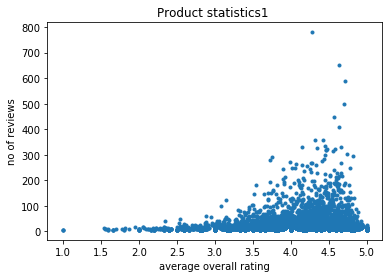

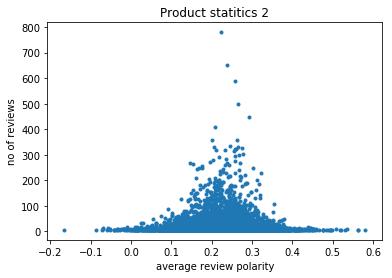

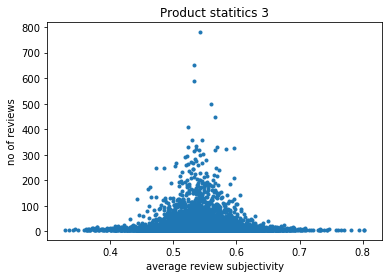

In [18]:
fig4 = plt.figure()
ax4 = fig4.add_subplot(1,1,1)
ax4.scatter(frame["average overall rating"].values, frame["number of reviews"].values, marker = ".")

ax4.set_ylabel("no of reviews")
ax4.set_xlabel("average overall rating")

plt.title("Product statistics1 ")
plt.show()


fig5 = plt.figure()
ax5 = fig5.add_subplot(1,1,1)

ax5.scatter(frame["average review polarity"].values, frame["number of reviews"].values, marker = ".")


ax5.set_ylabel("no of reviews")
ax5.set_xlabel("average review polarity")

plt.title("Product statitics 2")
plt.show()

fig6 = plt.figure()
ax6 = fig6.add_subplot(1,1,1)

ax6.scatter(frame["average review subjectivity"].values, frame["number of reviews"].values, marker = ".")

ax6.set_ylabel("no of reviews")
ax6.set_xlabel("average review subjectivity")

plt.title("Product statitics 3")
plt.show()

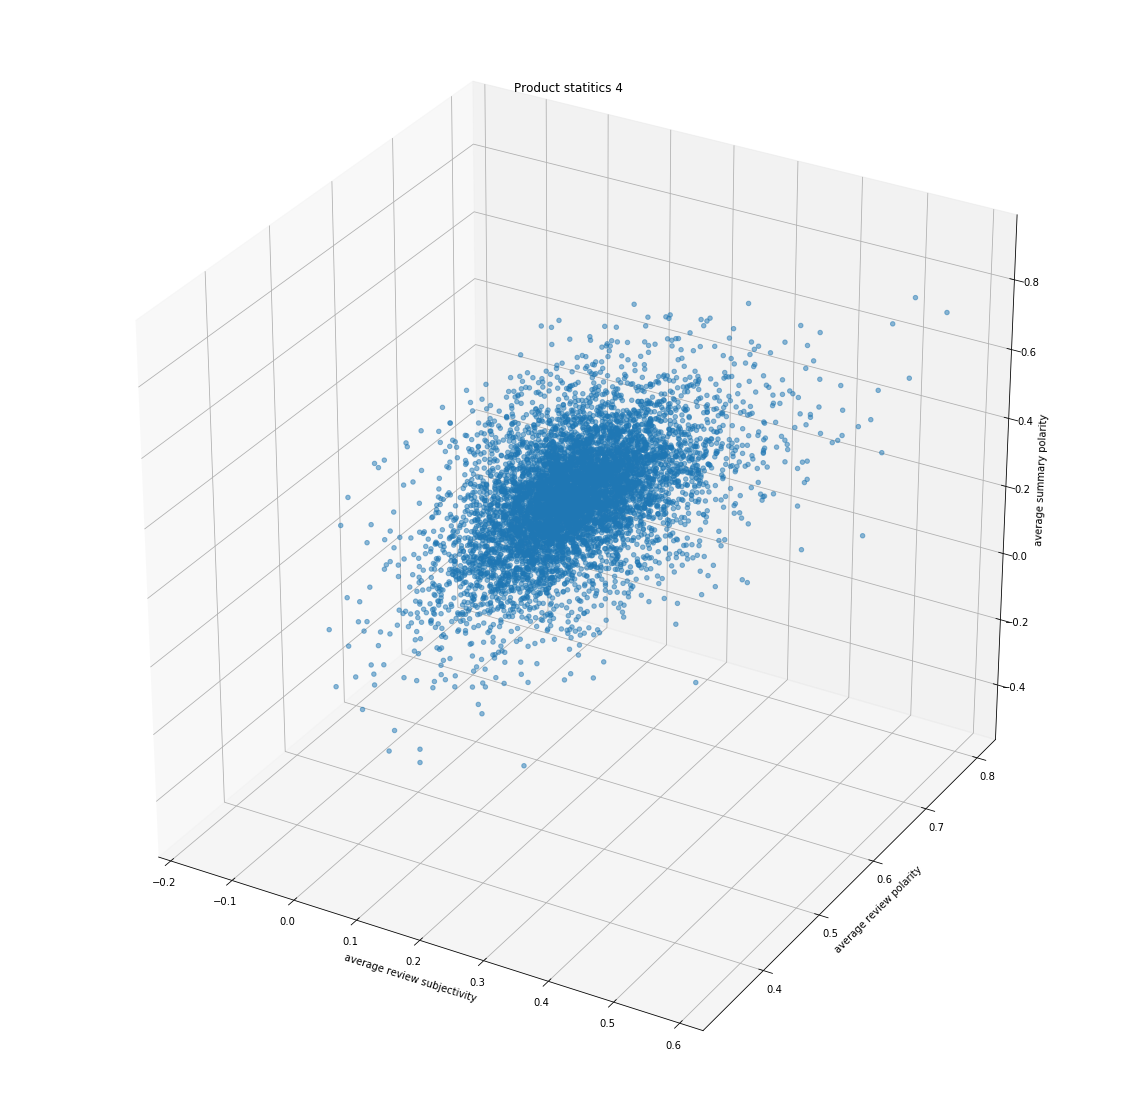

In [19]:
fig7 = plt.figure(figsize = (20,20))
ax7 = fig7.add_subplot(111, projection = "3d")

ax7.scatter(frame["average review polarity"].values, frame["average review subjectivity"].values,frame["average summary polarity"].values, alpha = 0.5)


ax7.set_ylabel("average review polarity")
ax7.set_xlabel("average review subjectivity")
ax7.set_zlabel("average summary polarity")

plt.title("Product statitics 4")
plt.show()